<a href="https://colab.research.google.com/github/Sunnyg83/BSA_NFL_Predictor/blob/main/BSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df = pd.read_csv("RZ_eff - Sheet1 (1).csv")

In [ ]:
df.describe()

,Team,2024
count,32,32
unique,32,27
top,Baltimore,50.00%
freq,1,4


In [ ]:
df.shape

(32, 2)

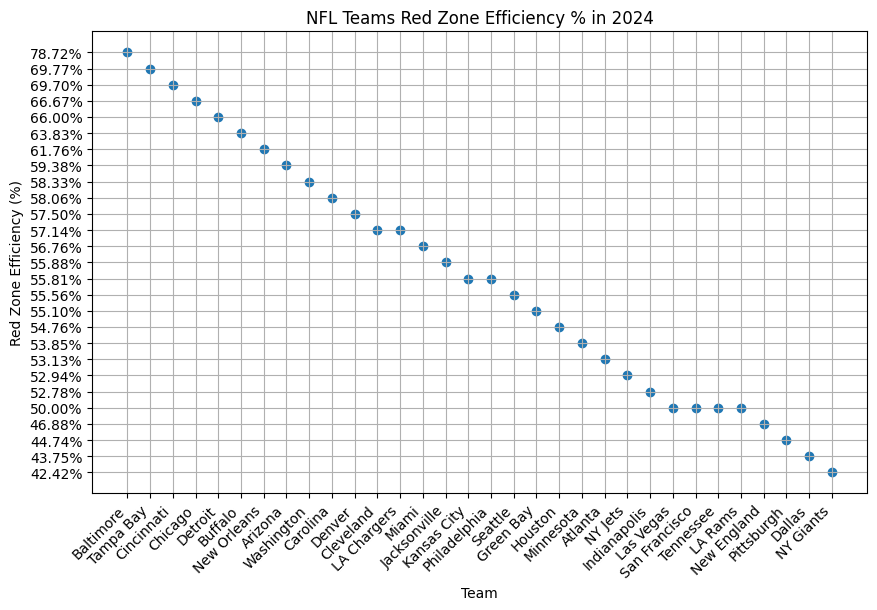

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Team'], df['2024'])


plt.xlabel("Team")
plt.ylabel("Red Zone Efficiency (%)")
plt.title("NFL Teams Red Zone Efficiency % in 2024")
plt.xticks(rotation=45, ha='right')
plt.grid(True)


plt.gca().invert_yaxis()

plt.show()

In [ ]:
df2 = pd.read_csv("EPA - Sheet1 (1).csv")

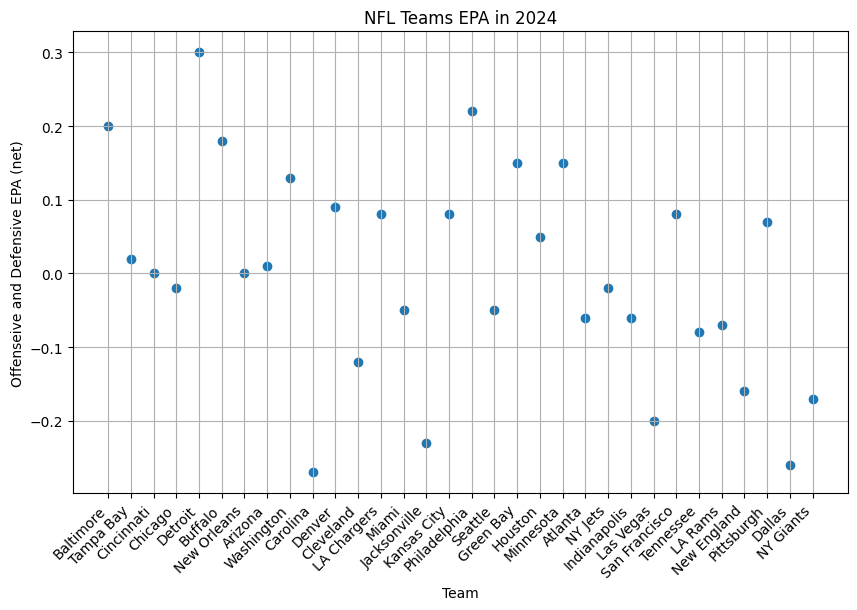

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['Team'], df2['EPA'])


plt.xlabel("Team")
plt.ylabel("Offenseive and Defensive EPA (net)")
plt.title("NFL Teams EPA in 2024")
plt.xticks(rotation=45, ha='right')
plt.grid(True)



plt.show()

In [ ]:
df3 = pd.read_csv("Record - Sheet1.csv")

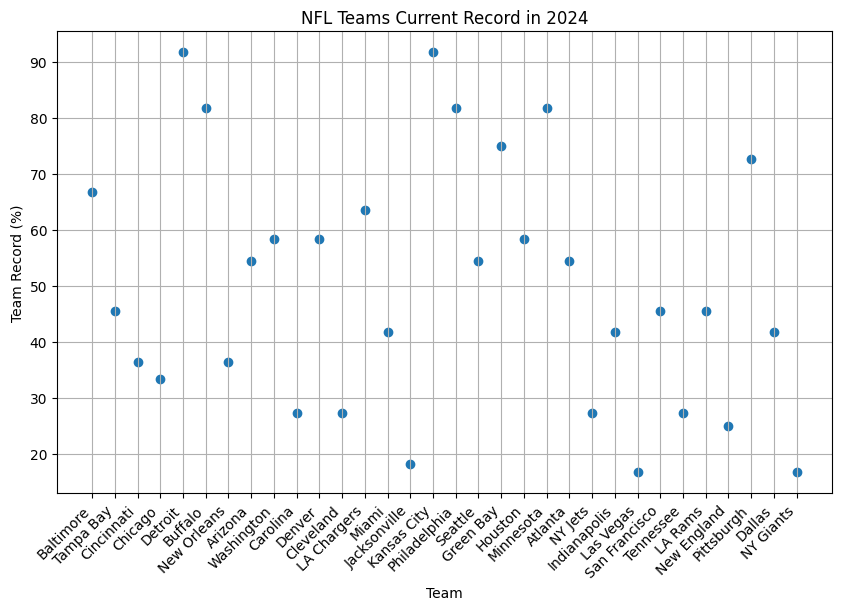

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['Team'], df3['Record'])


plt.xlabel("Team")
plt.ylabel("Team Record (%)")
plt.title("NFL Teams Current Record in 2024")
plt.xticks(rotation=45, ha='right')
plt.grid(True)




plt.show()

In [ ]:
df4 = pd.read_csv("SOS - Sheet1.csv")

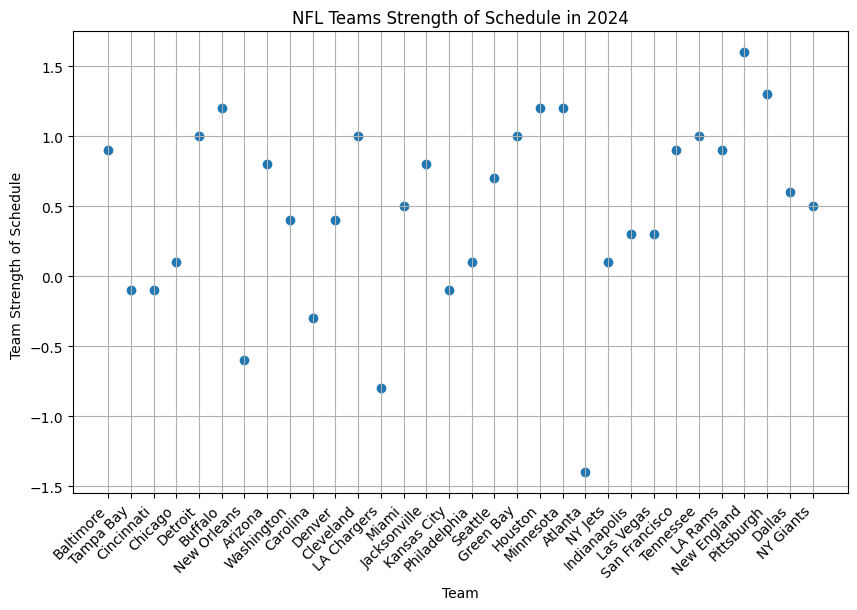

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df4['Team'], df4['SOS'])


plt.xlabel("Team")
plt.ylabel("Team Strength of Schedule ")
plt.title("NFL Teams Strength of Schedule in 2024")
plt.xticks(rotation=45, ha='right')
plt.grid(True)




plt.show()

In [ ]:
df5 = pd.read_csv("PD - Sheet1.csv")

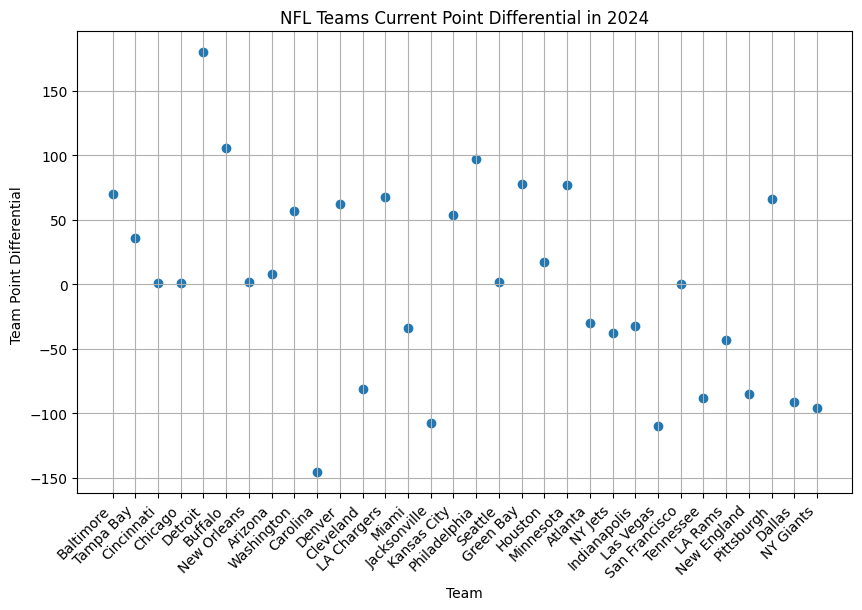

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df5['Team'], df5['PD'])


plt.xlabel("Team")
plt.ylabel("Team Point Differential ")
plt.title("NFL Teams Current Point Differential in 2024")
plt.xticks(rotation=45, ha='right')
plt.grid(True)




plt.show()

In [ ]:
big_df = pd.read_csv("Big_Dataset - Sheet1.csv")

In [41]:
import pandas as pd


big_df = pd.read_csv("Big_Dataset - Sheet1.csv")


features_to_scale = ['RZ_Eff', 'EPA',  'Record' ,  'SOS' ,  'PD' ]


for feature in features_to_scale:

    if big_df[feature].dtype == 'object':
        try:
            big_df[feature] = big_df[feature].str.rstrip('%').astype('float') / 100
        except AttributeError:
            pass


    min_val = big_df[feature].min()
    max_val = big_df[feature].max()


    big_df[feature + '_scaled'] = (big_df[feature] - min_val) / (max_val - min_val)

    columns_to_remove = ['RZ_Eff', 'EPA', 'Record', 'SOS', 'PD']
df_scaled = big_df.drop(columns=columns_to_remove)


print(df_scaled)

             Team  RZ_Eff_scaled  EPA_scaled  Record_scaled  SOS_scaled  \
0       Baltimore       1.000000    0.824561       0.824561    0.766667   
1       Tampa Bay       0.753444    0.508772       0.508772    0.433333   
2      Cincinnati       0.751515    0.473684       0.473684    0.433333   
3         Chicago       0.668044    0.438596       0.438596    0.500000   
4         Detroit       0.649587    1.000000       1.000000    0.800000   
5         Buffalo       0.589807    0.789474       0.789474    0.866667   
6     New Orleans       0.532782    0.473684       0.473684    0.266667   
7         Arizona       0.467218    0.491228       0.491228    0.733333   
8      Washington       0.438292    0.701754       0.701754    0.600000   
9        Carolina       0.430854    0.000000       0.000000    0.366667   
10         Denver       0.415427    0.631579       0.631579    0.600000   
11      Cleveland       0.405510    0.263158       0.263158    0.800000   
12    LA Chargers       0

In [59]:
import pandas as pd


scaled_columns = [col for col in df_scaled.columns if col.endswith('_scaled')]


team_overall_average = df_scaled.groupby('Team')[scaled_columns].mean().mean(axis=1)


print(team_overall_average)

Team
Arizona          0.531080
Atlanta          0.277542
Baltimore        0.815673
Buffalo          0.761685
Carolina         0.159504
Chicago          0.499231
Cincinnati       0.516627
Cleveland        0.386242
Dallas           0.181421
Denver           0.583324
Detroit          0.889917
Green Bay        0.662022
Houston          0.565884
Indianapolis     0.387720
Jacksonville     0.272210
Kansas City      0.528754
LA Chargers      0.498004
LA Rams          0.398637
Las Vegas        0.226305
Miami            0.428773
Minnesota        0.667855
NY Giants        0.227517
NY Jets          0.399658
New England      0.339189
New Orleans      0.440161
Philadelphia     0.666714
Pittsburgh       0.561440
San Francisco    0.530281
Seattle          0.457580
Tampa Bay        0.552521
Tennessee        0.370679
Washington       0.612900
dtype: float64


In [60]:
import pandas as pd


scaled_columns = [col for col in df_scaled.columns if col.endswith('_scaled')]


team_overall_average = df_scaled.groupby('Team')[scaled_columns].mean().mean(axis=1)


predicted_winner = team_overall_average.idxmax()


print("The predicted winner of the 2024 NFL season is:", predicted_winner)

The predicted winner of the 2024 NFL season is: Detroit


In [61]:
import pandas as pd



ranked_teams = team_overall_average.sort_values(ascending=False)


print("\nRankings:")
for i, (team, average) in enumerate(ranked_teams.items(), 1):
    print(f"{i}. {team}: {average:.4f}")


Rankings:
1. Detroit: 0.8899
2. Baltimore: 0.8157
3. Buffalo: 0.7617
4. Minnesota: 0.6679
5. Philadelphia: 0.6667
6. Green Bay: 0.6620
7. Washington: 0.6129
8. Denver: 0.5833
9. Houston: 0.5659
10. Pittsburgh: 0.5614
11. Tampa Bay: 0.5525
12. Arizona: 0.5311
13. San Francisco: 0.5303
14. Kansas City: 0.5288
15. Cincinnati: 0.5166
16. Chicago: 0.4992
17. LA Chargers: 0.4980
18. Seattle: 0.4576
19. New Orleans: 0.4402
20. Miami: 0.4288
21. NY Jets: 0.3997
22. LA Rams: 0.3986
23. Indianapolis: 0.3877
24. Cleveland: 0.3862
25. Tennessee: 0.3707
26. New England: 0.3392
27. Atlanta: 0.2775
28. Jacksonville: 0.2722
29. NY Giants: 0.2275
30. Las Vegas: 0.2263
31. Dallas: 0.1814
32. Carolina: 0.1595


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




scaled_columns = [col for col in df_scaled.columns if col.endswith('_scaled')]
X = df_scaled[scaled_columns]
y = df_scaled['Team']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


probabilities = model.predict_proba(X)
team_probabilities = pd.DataFrame({'Team': df_scaled['Team'], 'Probability': probabilities.max(axis=1)})


best_team = team_probabilities.loc[team_probabilities['Probability'].idxmax(), 'Team']
best_team_probability = team_probabilities.loc[team_probabilities['Probability'].idxmax(), 'Probability']
best_team_percentage = best_team_probability * 100
print(f"\nLogistic Regression Prediction:")
print(f"{best_team} have a {best_team_percentage:.2f}% chance of winning.")


team_overall_average = df_scaled.groupby('Team')[scaled_columns].mean().mean(axis=1)
predicted_winner = team_overall_average.idxmax()
print(f"\nThe predicted winner of the 2024 NFL season is: {predicted_winner}")


ranked_teams = team_overall_average.sort_values(ascending=False)
print("\nRankings:")



for i, (team, average) in enumerate(ranked_teams.items(),1):
    print(f"{i}. {team}: {average:.4f}")




top_5_teams_in_rankings = ranked_teams.head(5).index.tolist()  # Get top 5 teams
top_5_probabilities = team_probabilities[team_probabilities['Team'].isin(top_5_teams_in_rankings)]


print("\nLogistic Regression Prediction - Top 5 Teams in Rankings:")
for index, row in top_5_probabilities.iterrows():
    team_name = row['Team']
    probability = row['Probability'] * 100
    print(f"{team_name}: {probability:.2f}%")




Logistic Regression Prediction:
Detroit have a 7.60% chance of winning.

The predicted winner of the 2024 NFL season is: Detroit

Rankings:
1. Detroit: 0.8899
2. Baltimore: 0.8157
3. Buffalo: 0.7617
4. Minnesota: 0.6679
5. Philadelphia: 0.6667
6. Green Bay: 0.6620
7. Washington: 0.6129
8. Denver: 0.5833
9. Houston: 0.5659
10. Pittsburgh: 0.5614
11. Tampa Bay: 0.5525
12. Arizona: 0.5311
13. San Francisco: 0.5303
14. Kansas City: 0.5288
15. Cincinnati: 0.5166
16. Chicago: 0.4992
17. LA Chargers: 0.4980
18. Seattle: 0.4576
19. New Orleans: 0.4402
20. Miami: 0.4288
21. NY Jets: 0.3997
22. LA Rams: 0.3986
23. Indianapolis: 0.3877
24. Cleveland: 0.3862
25. Tennessee: 0.3707
26. New England: 0.3392
27. Atlanta: 0.2775
28. Jacksonville: 0.2722
29. NY Giants: 0.2275
30. Las Vegas: 0.2263
31. Dallas: 0.1814
32. Carolina: 0.1595

Logistic Regression Prediction - Top 5 Teams in Rankings:
Baltimore: 6.52%
Detroit: 7.60%
Buffalo: 5.92%
Philadelphia: 5.62%
Minnesota: 5.20%
